In [22]:
import numpy as np
from random import random
from scipy.stats import chi2

![image.png](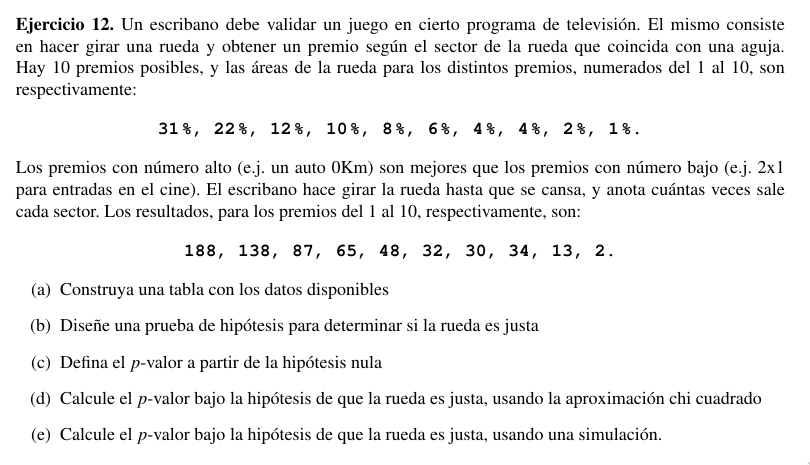

In [27]:
# Esto es lo esperado
p = [0.31, 0.22, 0.12, 0.1, 0.08, 0.06, 0.04, 0.04, 0.02, 0.01]
frec_obs = [188, 138, 87, 65, 48, 32, 30, 34, 13, 2]

def prob():
  u = random()
  if u < 0.31:
    return 0
  if u < 0.53:
    return 1
  if u < 0.65:
    return 2
  if u < 0.75:
    return 3
  if u < 0.83:
    return 4
  if u < 0.89:
    return 5
  if u < 0.93:
    return 6
  if u < 0.97:
    return 7
  if u < 0.99:
    return 8
  else:
    return 9

# b)
# H0: La rueda es justa y tiene distribucion p

def T(n, frec, p):
  N = frec
  k = len(N)
  t = 0
  for i in range(k):
    t += (N[i] - n*p[i])**2 / (n*p[i])

  return t
# T =  9.8104
# pvalor con chicuadrado: 0.3661
t = T(sum(frec_obs), frec_obs, p)
print("Valor con chi2")
print(t)
print(1 - chi2.cdf(t, 9))

# Simular
def simulacion(frec_obs, p, nsim):
  n = sum(frec_obs)
  t = T(n, frec_obs, p)
  pvalor = 0

  frec_muestra = np.zeros(10, int)
  for i in range(nsim):
    frec_muestra *= 0
    for j in range(n):
      pi = prob()
      frec_muestra[pi] += 1
    tsim = 0
    for j in range(10):
      tsim += (frec_muestra[j] - n*p[j])**2 / (n*p[j])
    if tsim >= t:
      pvalor += 1

  return pvalor/nsim
print("Valor simulado")
print(simulacion(frec_obs, p, 10_000))



Valor con chi2
9.810370888711903
0.36605389988682613
Valor simulado
0.3635
